In [4]:
import matplotlib
#matplotlib.use('GTK3Cairo')
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import subprocess

In [5]:
def read_medidas(path):
    with open(path, 'r') as f:
        lineas = f.readlines()
    tiempo = float(lineas[1])
    acc = float(lineas[3])
    prec = float(lineas[5])
    recall = float(lineas[7])
    return (tiempo, acc, prec, recall)

In [56]:
ejecutable = './tp2'
ul = '0.1'
ll = '0.03'
ks = [1,5,15,47,79]
#ks = [47]
alphas = [1,3,5,10,15,20,25,30,35,40,45,50]
in_path = {100: 'defecto', 75 : 'exp/exp_5/train/train.75.csv', 50 : 'exp/exp_5/train/train.50.csv', 
          25 : 'exp/exp_5/train/train.25.csv'}
tam = [100,75,50,25]
test_path = 'exp/exp_5/test/test.50000.25000.csv'
out_path = 'exp/exp_5/res/res.csv.'
medidas_path = 'exp/exp_5/medidas/med.csv.'

In [55]:
for k in ks:
    for alpha in alphas:
        for t in tam:
            if t == 100:
                proceso_1 = subprocess.Popen([ejecutable, '-m', str(1), '-o', out_path+str(t)+'.'+str(k)+'.'+str(alpha), '-k', str(k),
                '-a',str(alpha) ,'-r', medidas_path+str(t)+'.'+str(k)+'.'+str(alpha), '-l', str(ll), '-u', str(ul)], stdout=subprocess.PIPE)  

                [output, error] = proceso_1.communicate()
                print(output)
            else:
                proceso_1 = subprocess.Popen([ejecutable, '-m', str(1), '-i', in_path[t], '-o', out_path+str(t)+'.'+str(k)+'.'+str(alpha), '-k', str(k),
                '-a',str(alpha),'-r', medidas_path+str(t)+'.'+str(k)+'.'+str(alpha), '-l', str(ll), '-u', str(ul)], stdout=subprocess.PIPE)  

                [output, error] = proceso_1.communicate()
                print(output)     

b'train size25000\ntest size25000\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\nAccuracy general\n0.569199\nPrecision general\n0.575818\nRecall general\n0.568315\n\n'
b'train size25000\ntest size25000\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\nAccuracy general\n0.570680\nPrecision general\n0.576058\nRecall general\n0.569947\n\n'
b'train size25000\ntest size25000\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\nAccuracy general\n0.555956\nPrecision general\n0.554853\nRecall general\n0.556099\n\n'
b'train size25000\ntest size25000\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\nAccuracy general\n0.530869\nPrecision general\n0.567176\nRecall general\n0.528797\n\n'
b'train size25000\ntest size25000\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\ntrain size24998

b'train size25000\ntest size25000\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\nAccuracy general\n0.730965\nPrecision general\n0.697047\nRecall general\n0.747790\n\n'
b'train size25000\ntest size25000\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\nAccuracy general\n0.729964\nPrecision general\n0.726254\nRecall general\n0.731699\n\n'
b'train size25000\ntest size25000\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\nAccuracy general\n0.740007\nPrecision general\n0.745619\nRecall general\n0.737359\n\n'
b'train size25000\ntest size25000\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\nAccuracy general\n0.734886\nPrecision general\n0.732736\nRecall general\n0.735916\n\n'
b'train size25000\ntest size25000\ntrain size24998\ntest size24993\ntrain size24998\ntest size24993\ntrain size24998

In [ ]:
'''
ejecutable = './tp2'
ul = '0.1'
ll = '0.03'
ks = [1,5,21,79]
alphas = [1,2,3,5,10,15,20,25,30,35,40,45,50]
in_path = {100: 'defecto', 75 : 'exp/exp_5/train/train.75.csv', 50 : 'exp/exp_5/train/train.50.csv', 
          25 : 'exp/exp_5/train/train.25.csv'}
tam = [100,75,50,25]
test_path = 'exp/exp_5/test/test.50000.25000.csv'
out_path = 'exp/exp_5/res/res.csv.'
medidas_path = 'exp/exp_5/medidas/med.csv.'

In [ ]:
#ejecutable = './tp2'
#ks = [1,5,15,47,79]
#alphas = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]


In [60]:
tiempos = {100: [], 75: [], 50: [], 25: []}
acc = {100: [], 75: [], 50: [], 25: []}
prec = {100: [], 75: [], 50: [], 25: []}
recall = {100: [], 75: [], 50: [], 25: []}
lol = [1,3,5,7]
datos = {1: (tiempos,acc,prec,recall), 5: (tiempos,acc,prec,recall), 15: (tiempos,acc,prec,recall),
         47: (tiempos,acc,prec,recall), 79: (tiempos,acc,prec,recall)}
for alpha in alphas:
    for t in tam:
        metrics = read_medidas(medidas_path+str(t)+'.'+str(5)+'.'+str(alpha))
        tiempos[t].append(metrics[0])
        acc[t].append(metrics[1])
        prec[t].append(metrics[2])
        recall[t].append(metrics[3])

In [105]:
tiempos = {100: [], 75: [], 50: [], 25: []}
acc = {100: [], 75: [], 50: [], 25: []}
prec = {100: [], 75: [], 50: [], 25: []}
recall = {100: [], 75: [], 50: [], 25: []}
lol = [1,3,5,7]
#res = {{100: [], 75: [], 50: [], 25: []}, {100: [], 75: [], 50: [], 25: []}, {100: [], 75: [], 50: [], 25: []}, 
#       {100: [], 75: [], 50: [], 25: []}}
datos = {1 : {'tiempos': {100: [], 75: [], 50: [], 25: []}, 'acc' : {100: [], 75: [], 50: [], 25: []}, 
              'prec': {100: [], 75: [], 50: [], 25: []}, 'recall': {100: [], 75: [], 50: [], 25: []}},
        5: {'tiempos': {100: [], 75: [], 50: [], 25: []}, 'acc' : {100: [], 75: [], 50: [], 25: []}, 
              'prec': {100: [], 75: [], 50: [], 25: []}, 'recall': {100: [], 75: [], 50: [], 25: []}},
        15: {'tiempos': {100: [], 75: [], 50: [], 25: []}, 'acc' : {100: [], 75: [], 50: [], 25: []}, 
              'prec': {100: [], 75: [], 50: [], 25: []}, 'recall': {100: [], 75: [], 50: [], 25: []} },
        47: {'tiempos': {100: [], 75: [], 50: [], 25: []}, 'acc' : {100: [], 75: [], 50: [], 25: []}, 
              'prec': {100: [], 75: [], 50: [], 25: []}, 'recall': {100: [], 75: [], 50: [], 25: []}},
        79: {'tiempos': {100: [], 75: [], 50: [], 25: []}, 'acc' : {100: [], 75: [], 50: [], 25: []}, 
              'prec': {100: [], 75: [], 50: [], 25: []}, 'recall': {100: [], 75: [], 50: [], 25: []}}}

for k in ks:
    for alpha in alphas:
        for t in tam:
            metrics = read_medidas(medidas_path+str(t)+'.'+str(k)+'.'+str(alpha))
            datos[k]['tiempos'][t].append(metrics[0])
            datos[k]['acc'][t].append(metrics[1])
            datos[k]['prec'][t].append(metrics[2])
            datos[k]['recall'][t].append(metrics[3])


In [110]:


tiempos = {100: {1: [], 5: [],15:[],47:[],79:[]}, 75: {1: [], 5: [],15:[],47:[],79:[]}, 
           50: {1: [], 5: [],15:[],47:[],79:[]}, 25: {1: [], 5: [],15:[],47:[],79:[]}}
acc = {100: {1: [], 5: [],15:[],47:[],79:[]}, 75: {1: [], 5: [],15:[],47:[],79:[]}, 
           50: {1: [], 5: [],15:[],47:[],79:[]}, 25: {1: [], 5: [],15:[],47:[],79:[]}}
prec = {100: {1: [], 5: [],15:[],47:[],79:[]}, 75: {1: [], 5: [],15:[],47:[],79:[]}, 
           50: {1: [], 5: [],15:[],47:[],79:[]}, 25: {1: [], 5: [],15:[],47:[],79:[]}}
recall = {100: {1: [], 5: [],15:[],47:[],79:[]}, 75: {1: [], 5: [],15:[],47:[],79:[]}, 
           50: {1: [], 5: [],15:[],47:[],79:[]}, 25: {1: [], 5: [],15:[],47:[],79:[]}}

for t in tam:
    for k in ks:
        metrics = read_medidas('exp/exp_4/medidas/med.csv.'+str(t)+'.'+str(k))
        tiempos[t][k].append(metrics[0])
        acc[t][k].append(metrics[1])
        prec[t][k].append(metrics[2])
        recall[t][k].append(metrics[3])

In [113]:
acc[100][79]

[0.7864602089]

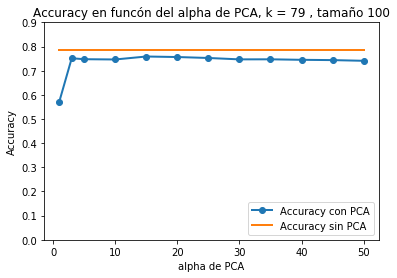

In [195]:
plt.plot(alphas, datos[79]['acc'][100], marker = 'o', linewidth = 2, label = "Accuracy con PCA")
plt.plot(alphas, acc[100][79]*len(alphas), linewidth = 2, label = "Accuracy sin PCA")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Accuracy en funcón del alpha de PCA, k = 79 , tamaño 100")
plt.legend(loc=4)
plt.savefig("pca_acc_79_100"+".png")
plt.show()

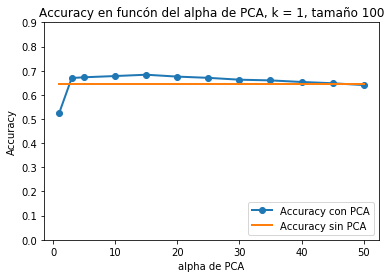

In [194]:
plt.plot(alphas, datos[1]['acc'][100], marker = 'o', linewidth = 2, label = "Accuracy con PCA")
plt.plot(alphas, acc[100][1]*len(alphas), linewidth = 2, label = "Accuracy sin PCA")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Accuracy en funcón del alpha de PCA, k = 1, tamaño 100")
plt.legend(loc=4)
plt.savefig("pca_acc_1_100"+".png")
plt.show()

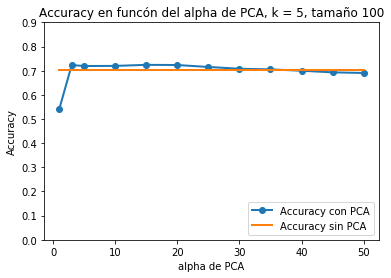

In [193]:
plt.plot(alphas, datos[5]['acc'][100], marker = 'o', linewidth = 2, label = "Accuracy con PCA")
plt.plot(alphas, acc[100][5]*len(alphas), linewidth = 2, label = "Accuracy sin PCA")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Accuracy en funcón del alpha de PCA, k = 5, tamaño 100")
plt.legend(loc=4)
plt.savefig("pca_acc_5_100"+".png")
plt.show()

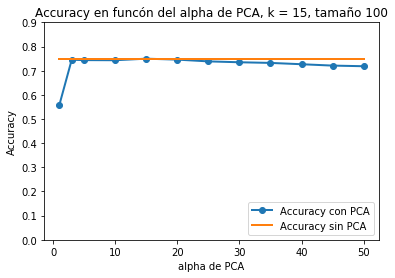

In [192]:
plt.plot(alphas, datos[15]['acc'][100], marker = 'o', linewidth = 2, label = "Accuracy con PCA")
plt.plot(alphas, acc[100][15]*len(alphas), linewidth = 2, label = "Accuracy sin PCA")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Accuracy en funcón del alpha de PCA, k = 15, tamaño 100")
plt.legend(loc=4)
plt.savefig("pca_acc_15_100"+".png")
plt.show()

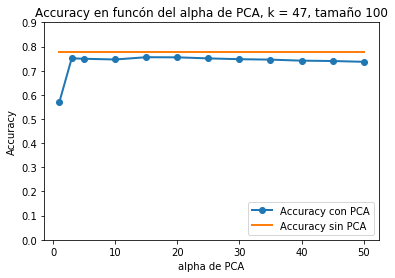

In [191]:
plt.plot(alphas, datos[47]['acc'][100], marker = 'o', linewidth = 2, label = "Accuracy con PCA")
plt.plot(alphas, acc[100][47]*len(alphas), linewidth = 2, label = "Accuracy sin PCA")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Accuracy en funcón del alpha de PCA, k = 47, tamaño 100")
plt.legend(loc=4)
plt.savefig("pca_acc_47_100"+".png")
plt.show()

### Precision

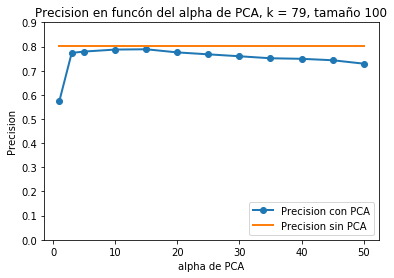

In [190]:
plt.plot(alphas, datos[79]['prec'][100], marker = 'o', linewidth = 2, label = "Precision con PCA")
plt.plot(alphas, prec[100][79]*len(alphas), linewidth = 2, label = "Precision sin PCA")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Precision")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Precision en funcón del alpha de PCA, k = 79, tamaño 100")
plt.legend(loc=4)
plt.savefig("pca_prec_79_100"+".png")
plt.show()

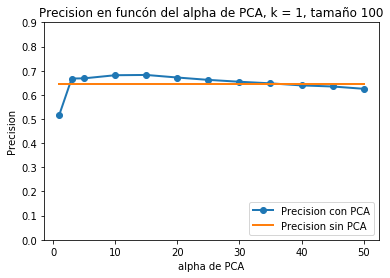

In [189]:
plt.plot(alphas, datos[1]['prec'][100], marker = 'o', linewidth = 2, label = "Precision con PCA")
plt.plot(alphas, prec[100][1]*len(alphas), linewidth = 2, label = "Precision sin PCA")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Precision")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Precision en funcón del alpha de PCA, k = 1, tamaño 100")
plt.legend(loc=4)
plt.savefig("pca_prec_1_100"+".png")
plt.show()

In [166]:
#ejecutable = './tp2'
#ks = [1,5,15,47,79]
#alphas = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]


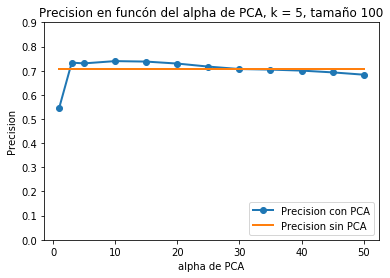

In [188]:
plt.plot(alphas, datos[5]['prec'][100], marker = 'o', linewidth = 2, label = "Precision con PCA")
plt.plot(alphas, prec[100][5]*len(alphas), linewidth = 2, label = "Precision sin PCA")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Precision")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Precision en funcón del alpha de PCA, k = 5, tamaño 100")
plt.legend(loc=4)
plt.savefig("pca_prec_5_100"+".png")
plt.show()

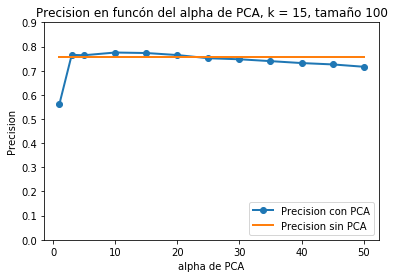

In [187]:
plt.plot(alphas, datos[15]['prec'][100], marker = 'o', linewidth = 2, label = "Precision con PCA")
plt.plot(alphas, prec[100][15]*len(alphas), linewidth = 2, label = "Precision sin PCA")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Precision")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Precision en funcón del alpha de PCA, k = 15, tamaño 100")
plt.legend(loc=4)
plt.savefig("pca_prec_15_100"+".png")
plt.show()

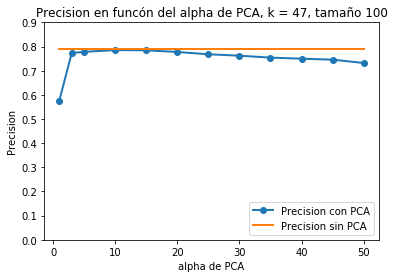

In [186]:
plt.plot(alphas, datos[47]['prec'][100], marker = 'o', linewidth = 2, label = "Precision con PCA")
plt.plot(alphas, prec[100][47]*len(alphas), linewidth = 2, label = "Precision sin PCA")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Precision")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Precision en funcón del alpha de PCA, k = 47, tamaño 100")
plt.legend(loc=4)
plt.savefig("pca_prec_47_100"+".png")
plt.show()

## Recall

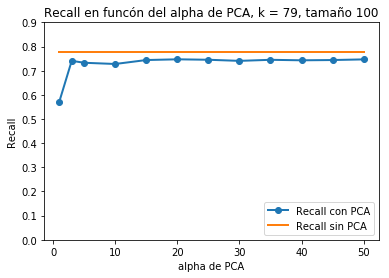

In [241]:
plt.plot(alphas, datos[79]['recall'][100], marker = 'o', linewidth = 2, label = "Recall con PCA")
plt.plot(alphas, recall[100][79]*len(alphas), linewidth = 2, label = "Recall sin PCA")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Recall")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Recall en funcón del alpha de PCA, k = 79, tamaño 100")
plt.legend(loc=4)
plt.savefig("pca_recall_79_100"+".png")
plt.show()

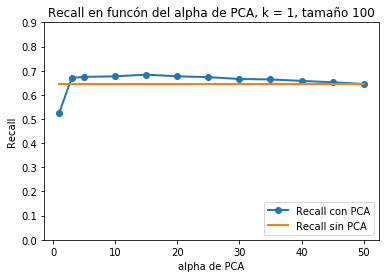

In [184]:
plt.plot(alphas, datos[1]['recall'][100], marker = 'o', linewidth = 2, label = "Recall con PCA")
plt.plot(alphas, recall[100][1]*len(alphas), linewidth = 2, label = "Recall sin PCA")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Recall")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Recall en funcón del alpha de PCA, k = 1, tamaño 100")
plt.legend(loc=4)
plt.savefig("pca_recall_1_100"+".png")
plt.show()

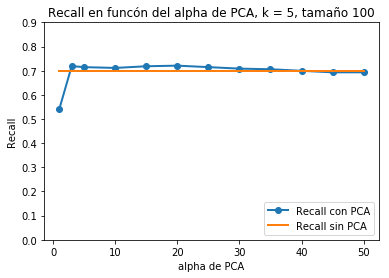

In [183]:
plt.plot(alphas, datos[5]['recall'][100], marker = 'o', linewidth = 2, label = "Recall con PCA")
plt.plot(alphas, recall[100][5]*len(alphas), linewidth = 2, label = "Recall sin PCA")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Recall")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Recall en funcón del alpha de PCA, k = 5, tamaño 100")
plt.legend(loc=4)
plt.savefig("pca_recall_5_100"+".png")
plt.show()

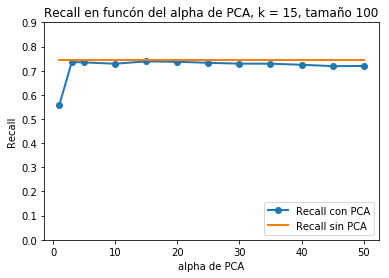

In [181]:
plt.plot(alphas, datos[15]['recall'][100], marker = 'o', linewidth = 2, label = "Recall con PCA")
plt.plot(alphas, recall[100][15]*len(alphas), linewidth = 2, label = "Recall sin PCA")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Recall")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Recall en funcón del alpha de PCA, k = 15, tamaño 100")
plt.legend(loc=4)
plt.savefig("pca_recall_15_100"+".png")
plt.show()

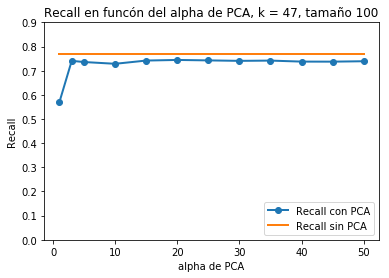

In [182]:
plt.plot(alphas, datos[47]['recall'][100], marker = 'o', linewidth = 2, label = "Recall con PCA")
plt.plot(alphas, recall[100][47]*len(alphas), linewidth = 2, label = "Recall sin PCA")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Recall")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Recall en funcón del alpha de PCA, k = 47, tamaño 100")
plt.legend(loc=4)
plt.savefig("pca_recall_47_100"+".png")
plt.show()

## Tamaños

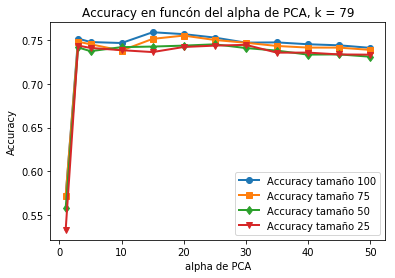

In [239]:
plt.plot(alphas, datos[79]['acc'][100], marker = 'o', linewidth = 2, label = "Accuracy tamaño 100")
#plt.plot(alphas, accuracy[100][79]*len(alphas), linewidth = 2, label = "Accuracy sin PCA")
plt.plot(alphas, datos[79]['acc'][75], marker = 's', linewidth = 2, label = "Accuracy tamaño 75")
plt.plot(alphas, datos[79]['acc'][50], marker = 'd', linewidth = 2, label = "Accuracy tamaño 50")
plt.plot(alphas, datos[79]['acc'][25], marker = 'v', linewidth = 2, label = "Accuracy tamaño 25")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Accuracy")
#plt.yticks(np.arange(0, 1, 0.1))
plt.title("Accuracy en funcón del alpha de PCA, k = 79")
plt.legend(loc=4)
#plt.savefig("pca_tam_acc_79"+".png")
plt.show()

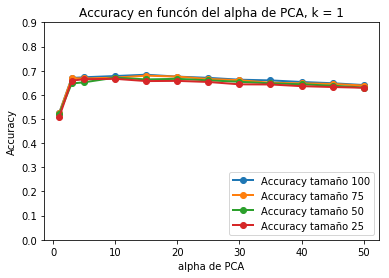

In [205]:
plt.plot(alphas, datos[1]['acc'][100], marker = 'o', linewidth = 2, label = "Accuracy tamaño 100")
#plt.plot(alphas, accuracy[100][79]*len(alphas), linewidth = 2, label = "Accuracy sin PCA")
plt.plot(alphas, datos[1]['acc'][75], marker = 'o', linewidth = 2, label = "Accuracy tamaño 75")
plt.plot(alphas, datos[1]['acc'][50], marker = 'o', linewidth = 2, label = "Accuracy tamaño 50")
plt.plot(alphas, datos[1]['acc'][25], marker = 'o', linewidth = 2, label = "Accuracy tamaño 25")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Accuracy en funcón del alpha de PCA, k = 1")
plt.legend(loc=4)
#plt.savefig("pca_tam_acc"+".png")
plt.show()

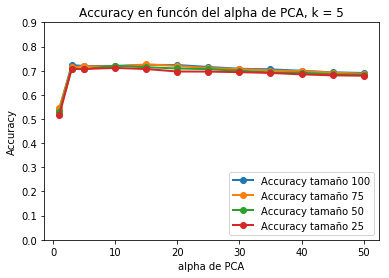

In [202]:
plt.plot(alphas, datos[5]['acc'][100], marker = 'o', linewidth = 2, label = "Accuracy tamaño 100")
#plt.plot(alphas, accuracy[100][79]*len(alphas), linewidth = 2, label = "Accuracy sin PCA")
plt.plot(alphas, datos[5]['acc'][75], marker = 'o', linewidth = 2, label = "Accuracy tamaño 75")
plt.plot(alphas, datos[5]['acc'][50], marker = 'o', linewidth = 2, label = "Accuracy tamaño 50")
plt.plot(alphas, datos[5]['acc'][25], marker = 'o', linewidth = 2, label = "Accuracy tamaño 25")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Accuracy en funcón del alpha de PCA, k = 5")
plt.legend(loc=4)
#plt.savefig("pca_recall_1_100"+".png")
plt.show()

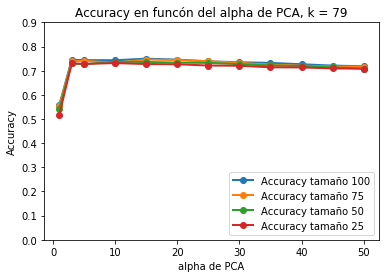

In [203]:
plt.plot(alphas, datos[15]['acc'][100], marker = 'o', linewidth = 2, label = "Accuracy tamaño 100")
#plt.plot(alphas, accuracy[100][79]*len(alphas), linewidth = 2, label = "Accuracy sin PCA")
plt.plot(alphas, datos[15]['acc'][75], marker = 'o', linewidth = 2, label = "Accuracy tamaño 75")
plt.plot(alphas, datos[15]['acc'][50], marker = 'o', linewidth = 2, label = "Accuracy tamaño 50")
plt.plot(alphas, datos[15]['acc'][25], marker = 'o', linewidth = 2, label = "Accuracy tamaño 25")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Accuracy en funcón del alpha de PCA, k = 79")
plt.legend(loc=4)
#plt.savefig("pca_recall_1_100"+".png")
plt.show()

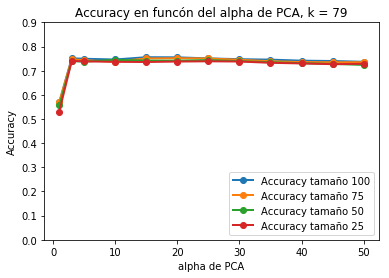

In [204]:
plt.plot(alphas, datos[47]['acc'][100], marker = 'o', linewidth = 2, label = "Accuracy tamaño 100")
#plt.plot(alphas, accuracy[100][79]*len(alphas), linewidth = 2, label = "Accuracy sin PCA")
plt.plot(alphas, datos[47]['acc'][75], marker = 'o', linewidth = 2, label = "Accuracy tamaño 75")
plt.plot(alphas, datos[47]['acc'][50], marker = 'o', linewidth = 2, label = "Accuracy tamaño 50")
plt.plot(alphas, datos[47]['acc'][25], marker = 'o', linewidth = 2, label = "Accuracy tamaño 25")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Accuracy en funcón del alpha de PCA, k = 79")
plt.legend(loc=4)
#plt.savefig("pca_recall_1_100"+".png")
plt.show()

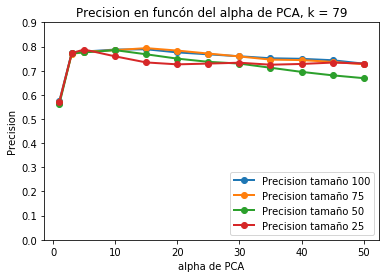

In [236]:
plt.plot(alphas, datos[79]['prec'][100], marker = 'o', linewidth = 2, label = "Precision tamaño 100")
#plt.plot(alphas, accuracy[100][79]*len(alphas), linewidth = 2, label = "Accuracy sin PCA")
plt.plot(alphas, datos[79]['prec'][75], marker = 'o', linewidth = 2, label = "Precision tamaño 75")
plt.plot(alphas, datos[79]['prec'][50], marker = 'o', linewidth = 2, label = "Precision tamaño 50")
plt.plot(alphas, datos[79]['prec'][25], marker = 'o', linewidth = 2, label = "Precision tamaño 25")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Precision")
plt.yticks(np.arange(0, 1, 0.1))
plt.title("Precision en funcón del alpha de PCA, k = 79")
plt.legend(loc=4)
#plt.savefig("pca_tam_prec_79"+".png")
plt.show()

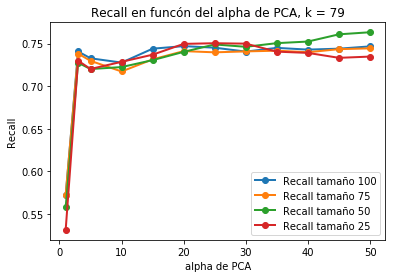

In [240]:
plt.plot(alphas, datos[79]['recall'][100], marker = 'o', linewidth = 2, label = "Recall tamaño 100")
#plt.plot(alphas, accuracy[100][79]*len(alphas), linewidth = 2, label = "Accuracy sin PCA")
plt.plot(alphas, datos[79]['recall'][75], marker = 'o', linewidth = 2, label = "Recall tamaño 75")
plt.plot(alphas, datos[79]['recall'][50], marker = 'o', linewidth = 2, label = "Recall tamaño 50")
plt.plot(alphas, datos[79]['recall'][25], marker = 'o', linewidth = 2, label = "Recall tamaño 25")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("Recall")
#plt.yticks(np.arange(0, 1, 0.1))
plt.title("Recall en funcón del alpha de PCA, k = 79")
plt.legend(loc=4)
#plt.savefig("pca_tam_recall_79"+".png")
plt.show()

## Tiempos

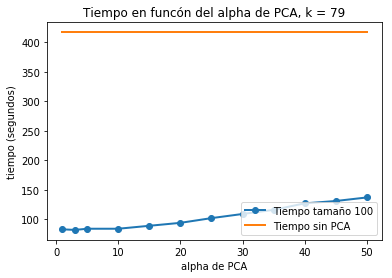

In [214]:
plt.plot(alphas, datos[79]['tiempos'][100], marker = 'o', linewidth = 2, label = "Tiempo tamaño 100")
plt.plot(alphas, tiempos[100][79]*len(alphas), linewidth = 2, label = "Tiempo sin PCA")
#plt.plot(ks, prec[100], marker='o', linestyle = '-', label = "Precision")
#plt.plot(ks, recall[100], marker='o', linestyle = '-.', label = "Recall")
plt.xlabel("alpha de PCA")
plt.ylabel("tiempo (segundos)")
plt.title("Tiempo en funcón del alpha de PCA, k = 79")
plt.legend(loc=4)
plt.savefig("pca_tiempo_79_100"+".png")
plt.show()